## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset, all data required
data_merged = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Set index
#data_merged.set_index("Mouse ID", inplace=True)

# Display the data table for preview
data_merged.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Identify incomplete rows
data_merged.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [4]:
# Checking the number of mice.
data_merged["Mouse ID"].value_counts()

g989    13
s337    10
g791    10
e227    10
k210    10
        ..
n482     1
x226     1
h428     1
f932     1
v199     1
Name: Mouse ID, Length: 249, dtype: int64

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mice = data_merged[data_merged[["Mouse ID", "Timepoint"]].duplicated() == True]
# duplicated_mice = data_merged[data_merged.duplicated(["Mouse ID", "Timepoint"])]

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [11]:
# Create a clean DataFrame by dropping the duplicate mouse by its index.
data_merged.drop([909, 911, 913, 915, 917], inplace=True)
#data_merged.drop(data_merged.index[909, 911, 913, 915, 917], inplace=True)

KeyError: '[909 911 913 915 917] not found in axis'

In [12]:
# Checking the number of mice in the clean DataFrame.
data_merged["Mouse ID"].value_counts()

s337    10
l661    10
e227    10
k210    10
c402    10
        ..
n482     1
x226     1
h428     1
f932     1
v199     1
Name: Mouse ID, Length: 249, dtype: int64

In [13]:
# Checking the total rows
data_merged.count()

Mouse ID              1888
Drug Regimen          1888
Sex                   1888
Age_months            1888
Weight (g)            1888
Timepoint             1888
Tumor Volume (mm3)    1888
Metastatic Sites      1888
dtype: int64

## Summary Statistics

In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.



In [15]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
# summary_statistics = data_merged.groupby("Drug Regimen")["Tumor Volume (mm3)"].aggregate(["mean", "median", "var", "std"])
summary_statistics = data_merged.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg([np.mean, np.median, np.var, np.std, sem])
summary_statistics


/Users/cintiaolivamercadomastach/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/cintiaolivamercadomastach/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/cintiaolivamercadomastach/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

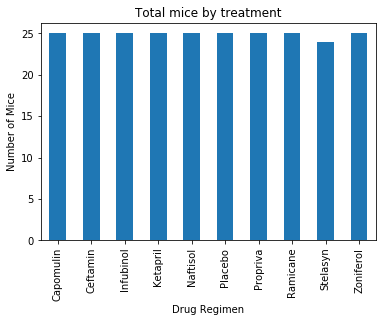

In [16]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas.

# Group series for total number of mice for each treatment
mice_count = data_merged.groupby(["Drug Regimen"]).agg({"Mouse ID": "nunique"})

# Create a bar chart based off of the group series from before
mice_count_bar = mice_count.plot(kind='bar', title="Total mice by treatment", legend=False)

# Set the xlabel and ylabel using class methods
mice_count_bar.set_xlabel("Drug Regimen")
mice_count_bar.set_ylabel("Number of Mice")


plt.show()
#plt.tight_layout()


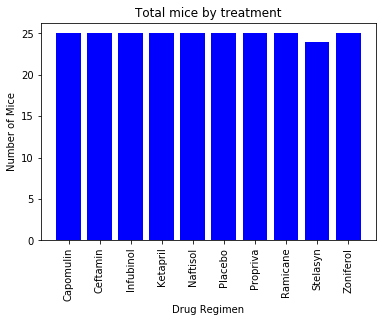

In [17]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

# List for x axis
x_axis = np.arange(len(mice_count.index))
x_axis

# List for y axis
#mice_total = mice_count["Mouse ID"]
#mice_total

# Bar chart based upon above lists
plt.bar(x_axis, mice_count["Mouse ID"], color='b', align="center")

# Place x axis headers
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, mice_count.index, rotation="vertical")

# Give the chart a title, x label, and y label
plt.title("Total mice by treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

# Print chart to screen
plt.show()
#plt.tight_layout()
#Text(0,0.5,'Number of Mice')

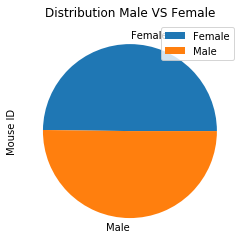

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Group series for total number of mice for each treatment
mice_count_sex = mouse_metadata.groupby(["Sex"])["Mouse ID"].count()
mice_count_sex

# Create a pie chart based off of the group series from before
mice_count_pie = mice_count_sex.plot(kind='pie', title="Distribution Male VS Female", legend=True)

# Set the xlabel and ylabel using class methods
#mice_count_pie.set_xlabel("Male/Female")
#mice_count_pie.set_ylabel("Number of Mice")


plt.show()


(-1.1199395799512024,
 1.1085163149757233,
 -1.1187480755433892,
 1.108793637086287)

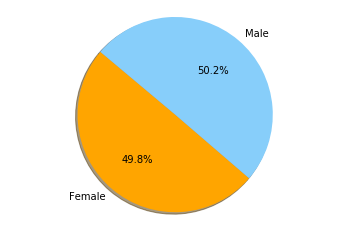

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

mice_count_sex = mouse_metadata.groupby(["Sex"])["Mouse ID"].count().to_frame("count")

# Labels for sections of pie chart
labels = mice_count_sex.index

# The values of each section of the pie chart
sizes = mice_count_sex["count"]

# The colors of each section of the pie chart
colors = ["orange", "lightskyblue"]

# Tells matplotlib to seperate the "Humans" section from the others
#explode = (0.1, 0, 0, 0)

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")

## Quartiles, Outliers and Boxplots

In [36]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
data_filtered = data_merged[(data_merged["Drug Regimen"] == "Capomulin") | 
                            (data_merged["Drug Regimen"] == "Ramicane") |
                            (data_merged["Drug Regimen"] == "Infubinol") |
                            (data_merged["Drug Regimen"] == "Ceftamin")]
data_grp = data_filtered.groupby("Mouse ID")["Timepoint"].max()
last_timepoint = pd.DataFrame({"Timepoint": data_grp})                              
last_timepoint

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
last_tumor_vol = last_timepoint.merge(study_results, on=["Mouse ID", "Timepoint"])
last_tumor_vol

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,45,67.973419,2
1,a251,45,65.525743,1
2,a275,45,62.999356,3
3,a411,45,38.407618,1
4,a444,45,43.047543,0
...,...,...,...,...
95,y769,45,68.594745,4
96,y793,45,31.896238,2
97,y865,45,64.729837,3
98,z578,45,30.638696,0


In [43]:
# Put treatments into a list for for loop (and later for plot labels)
treatments_reg = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
quartiles = last_tumor_vol["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

#print(f"Values below {lower_bound} could be outliers.")
#print(f"Values above {upper_bound} could be outliers.")

outliers = last_tumor_vol.loc[(last_tumor_vol["Tumor Volume (mm3)"] < lower_bound) | 
                              (last_tumor_vol["Tumor Volume (mm3)"] > upper_bound)]
outliers


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites


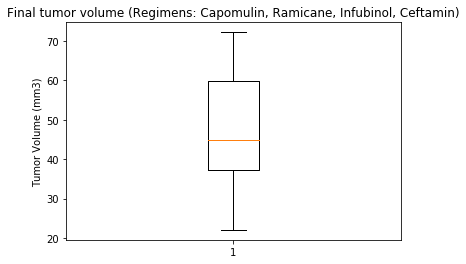

In [45]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Final tumor volume (Regimens: Capomulin, Ramicane, Infubinol, Ceftamin)')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(last_tumor_vol["Tumor Volume (mm3)"])
plt.show()

## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
